Kaggleのアカウントを作って、以下のリンクからデータを取得します。

https://www.kaggle.com/c/titanic-gettingStarted

train.csvをダウンロードし、このNotebookと同じフォルダに保存します。

In [26]:
import pandas as pd
from pandas import Series, DataFrame

In [27]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# データ概要
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


このデータから有用な知見を得るために、明確な目標があったほうが良いでしょう。いくつか、具体的な問いを設定してみます。

    1.) タイタニック号の乗客はどのような人達だったのか？
    2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
    3.) 乗客は主にどこから来たのか？
    4.) 家族連れか、単身者か？
    
これらの基本的な問いの後に、さらに深くデータ解析を進めます。

    5.) 沈没からの生還者には、どのような要因があったのか？

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

#### 1.) タイタニック号の乗客はどのような人達だったのか？

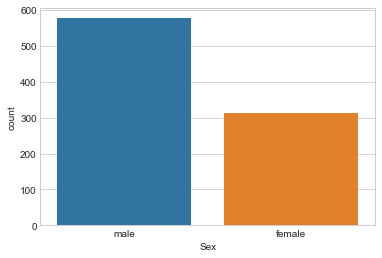

In [31]:
# 性別
sns.countplot('Sex', data=titanic_df)

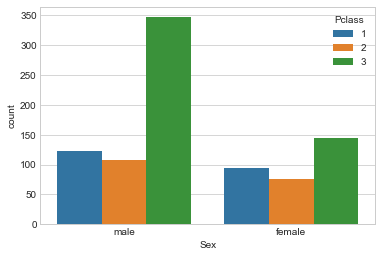

In [32]:
# 乗客の性別を客室で層別化
sns.countplot('Sex', data=titanic_df, hue='Pclass')

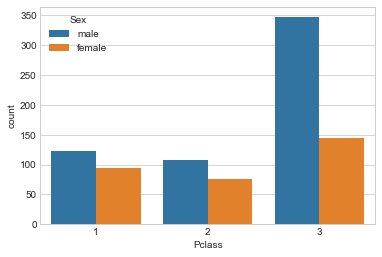

In [33]:
# 逆(乗客の客室を性別で層別化)
sns.countplot('Pclass', data=titanic_df, hue='Sex')

3等客室は女性に比べて、男性が圧倒的に多い事がわかります。 子供という概念を導入して、さらに客層を詳しく調べてみましょう。

In [34]:
# 16歳未満を子供とします。
def male_female_child(passenger):
    # 年齢と性別のデータを取得
    age, sex = passenger
    # 年齢を調べて16歳未満なら、子供、それ以外は性別をそのまま返す
    if age < 16:
        return 'child'
    else:
        return sex

In [35]:
# personという新しい列を追加します。
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [36]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


これで、男性、女性、子供という列が出来ました。これは後で、「女性と子供を先に！」という考えが実践されていたかどうかを確認するのに使います。

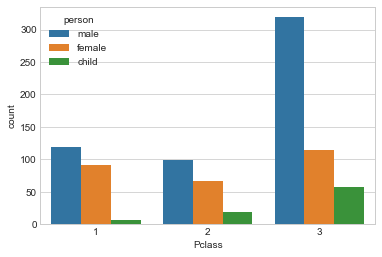

In [37]:
# 客室の種類別で人数を数えます。
sns.countplot('Pclass', data=titanic_df, hue='person')

3等客室には沢山の子供がいたのに、1等客室にはほとんど居ません。年齢に関する分布も少し詳しく見てみましょう。

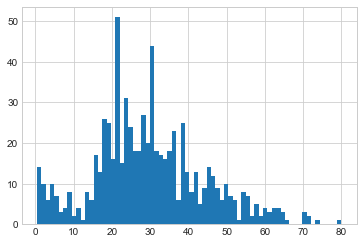

In [38]:
titanic_df['Age'].hist(bins=70)

In [39]:
titanic_df['Age'].mean()

29.69911764705882

In [40]:
# 数の小計を出すことも可能です。
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができる

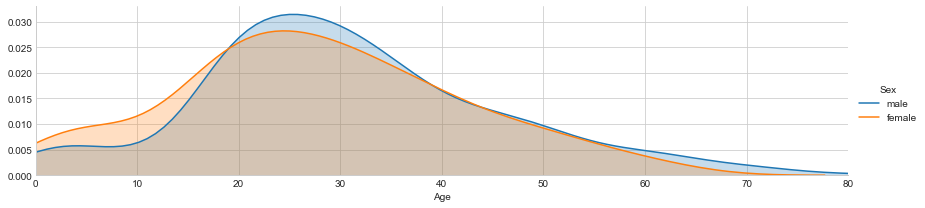

In [45]:
# 性別で層別化して、グラフを少し横長に設定
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
# mapを使って、性別ごとにkdeplotを描くようにします。
fig.map(sns.kdeplot, 'Age', shade=True)
# xの最大値を長老に合わせます
oldest = titanic_df['Age'].max()
# x軸の範囲を設定
fig.set(xlim=(0, oldest))
# 凡例
fig.add_legend()

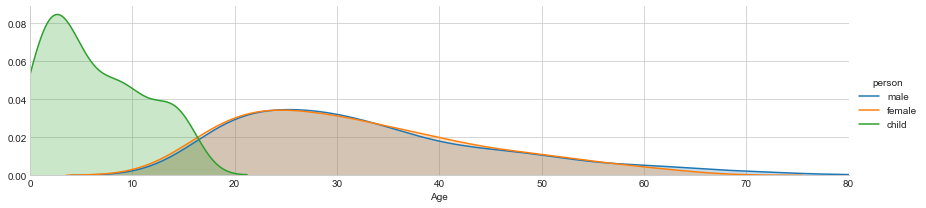

In [46]:
# person列について同じ事をやれば、子供も含めたKDE plotが描けます。
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

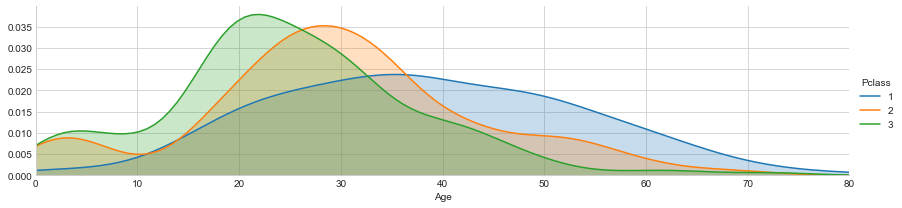

In [47]:
# 客室
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

性別、年齢、客室の種類など、乗客の全体像がよくわかって来たと思います。

次の質問に移りましょう。 

それぞれの乗客はどのデッキにいたか？


また、それは客室の種類とどのような関係にあったか？

In [52]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Cabinという列が、それぞれの乗客が居た場所ですが、NaN値があるので、まずはこれを除去します。

In [53]:
# NaNを消して、deckという新しいオブジェクトを作成
deck = titanic_df['Cabin'].dropna()

In [54]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

実は、最初の1文字だけあれば、どこにいたのか分かります。

In [66]:
# シンプルにfor文で取り出してみる

levels = []

# 1文字目を取り出す
for level in deck:
    levels.append(level[0])
    
levels[0:5]

['C', 'C', 'E', 'G', 'C']

In [64]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


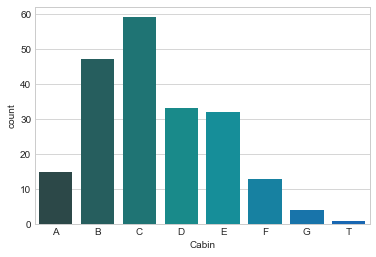

In [65]:
sns.countplot('Cabin', data=cabin_df, palette='winter_d', order=sorted(set(levels)))

Tだけ離れているので、恐らく、間違ったデータです。

In [68]:
# T以外のデータだけから新しくDataFrameを作ります。
cabin_df = cabin_df[cabin_df.Cabin != 'T']

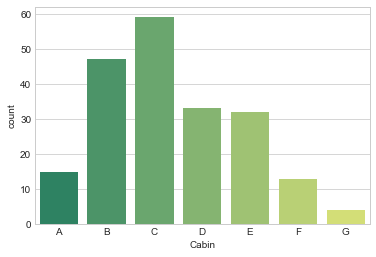

In [70]:
sns.countplot('Cabin', data=cabin_df, palette='summer', order=sorted(set(cabin_df.Cabin)))

グラフの色合いは、お好きなように変更できます。以下のリンクからお気に入りを探してみてください。
また、それぞれのpalette名には、「_d」を付けると、少し暗い色味になります。

リンク: http://matplotlib.org/users/colormaps.html

乗客が居た場所ごとの解析ができました。引き続き、3つ目の質問に応えていきましょう。

    3.) 乗客は主に、どこから来たのか？

In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


乗船した場所を示す「Embarked」列には、C,Q,S という値が入っています。 

Kaggleのページを参照すると、それぞれCherbourg, Queenstown, Southhamptonだということがわかります。

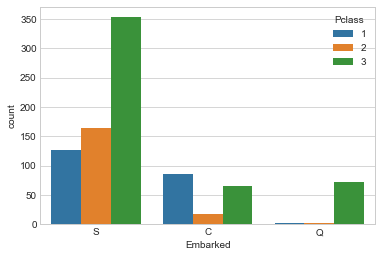

In [75]:
sns.countplot('Embarked', data=titanic_df, hue='Pclass')

In [76]:
# 実はNaNがある
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'C': 168, 'Q': 77, 'S': 644, nan: 2})

In [77]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Queenstownからの乗客のほとんどが、3等客室です。これは、当時のこの地域の経済が余り良くなかった事を反映しているのかも知れません。

それでは、4つめの質問です。

    4.) 家族連れか？単身者か？

In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [79]:
# 単身者かどうかを示す新しい列を追加しましょう。

# 親子、兄弟姉妹を示す列を足し合わせます。
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Alone列が0でなければ、その乗客は誰かと一緒に乗船したことが分かります。 

1人（Alone）と家族と（With Family）に分けてみましょう。

In [80]:
# 数字を、文字列に変換します。
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# 警告がでることがありますが、無視して構いません。詳しくは、以下を参照してみてください。
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

/Users/hiraku/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [81]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


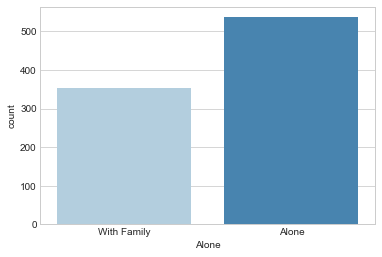

In [82]:
sns.countplot('Alone', data=titanic_df, palette='Blues')

それでは最後に最も興味深い問いである、どのよな要因が生死を分けたのかを見ていくことにしましょう。

In [83]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

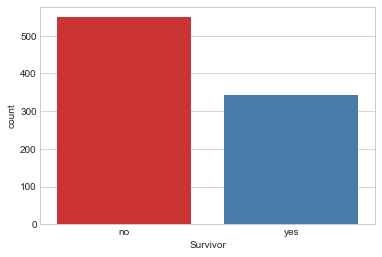

In [84]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

かなり多くの人々が犠牲になっているのがわかります。

客室の種類は関係あるのでしょうか？

映画Titanicで言われているように、3等客室の乗客への扱いが不当に悪かったかどうかを見てみます。

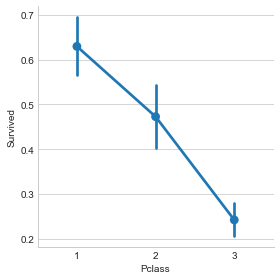

In [86]:
# こういった解析には、factorplotが便利です。
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3])

3等客室の乗客の生存率はかなり低いことが分かります。

ただし、これは3等客室に男性が多い、つまり、「女性と子供を先に」というポリシーの犠牲になったのかもしれません。

これを調べるために、もう少し詳しく見ていきましょう。

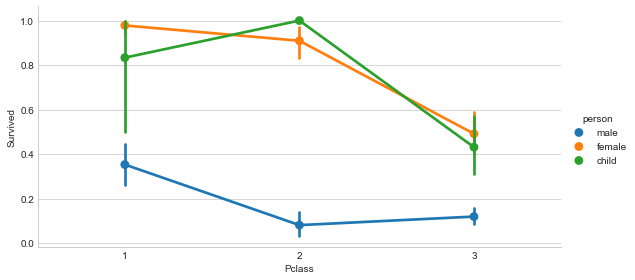

In [87]:
# 性別を考慮して、factorplotを描きます
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3], aspect=2)

3等客室の乗客の生存率は、やはり悪いことが分かります。

また、男性であるということは、生存率を著しく下げることも見て取れます。

2等客室の乗客に関しては、「女性と子供を先に」というポリシーが実践されていたようです。

それでは、年齢はどうでしょうか？

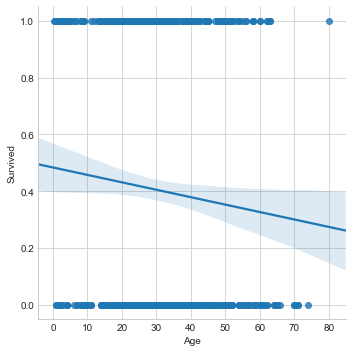

In [90]:
# 年齢と生存率のグラフを描いてみましょう。
sns.lmplot('Age', 'Survived', data=titanic_df)

年齢が上がるに連れて生存率が下がっているのが分かります。

ここに、客室の情報を加えてみましょう。

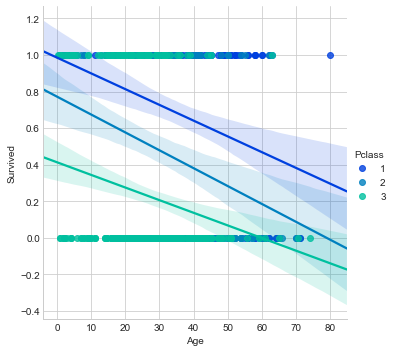

In [91]:
# 客室の種類で層別化します。
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=[1,2,3])

x_binsを使うと、少し見やすくできます。

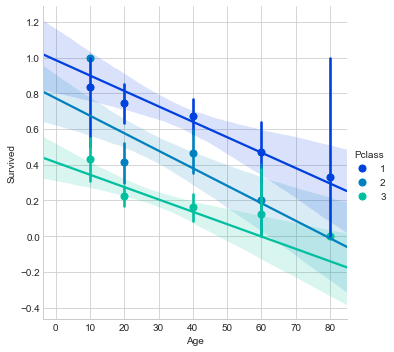

In [92]:
# ポイントを決めて、標準偏差を追記できます。
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations, hue_order=[1,2,3])

1等客室に、歳をとった偉い人が居た可能性があります。 性別と年齢の関係も見てみましょう。

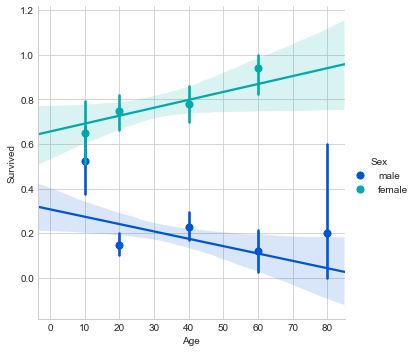

In [94]:
# 性別で層別化
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

性別、年齢、客室の等級が、生存率にどう影響するのかデータを可視化することができました。

慣れてきたと思うので、以下の問いにも挑戦してみましょう。

    1.) 乗客が居たデッキは生存率と関係あるか？また、その答えは感覚的な答えと合うだろうか？
    2.) 家族連れであることは、事故からの生還率を上げているだろうか？

躓いたり、また逆によいアイディアが思いついたりしたら、気軽にUdemyのサイトに投稿してください。